# MIMIC-III database

Analyzing PATIENTS, ADMISSIONS and DIAGNOSES_ICD tables.

Obs.: CAREGIVERS are linked with CHARTEVENTS table through CGID.

A schema generated by [SchemaSpy](https://mit-lcp.github.io/mimic-schema-spy/tables/admissions.html) is provided below:

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# Imports

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.font_manager
# Colab
import io

%matplotlib inline

### PLOT CONFIG

In [0]:
plt.style.use('ggplot')

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=11

### PATIENTS AND ADMISSIONS SCHEMA


In [0]:
Image(filename = IMG_PATH + "admissions.1degree.png", width=1000, height=1000)

### 1. PATIENTS TABLE


In [92]:
mimic_patients_df = pd.read_csv(io.BytesIO(uploaded['PATIENTS.csv']))
mimic_patients_df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [0]:
# Total patients
print("Total patients: " + str(mimic_patients_df.GENDER.count()))

# Total from each gender
mimic_patients_df.GENDER.value_counts()

Total patients: 46520


M    26121
F    20399
Name: GENDER, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


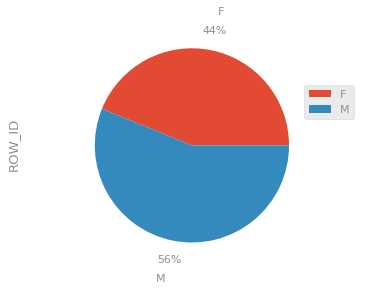

In [0]:
patients_by_gender = mimic_patients_df.groupby(['GENDER']).count()['ROW_ID'].plot(kind='pie', autopct='%1.0f%%', 
                                                                                  shadow=False, startangle=0, pctdistance=1.2, 
                                                                                  labeldistance=1.4)
patients_by_gender.axis('equal')
patients_by_gender.legend(bbox_to_anchor=(1.0, 0.8))

### 2. ADMISSIONS TABLE

In [5]:
mimic_admission_df = pd.read_csv(io.BytesIO(uploaded['ADMISSIONS.csv']))
mimic_admission_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [0]:
# Total admissions
mimic_admission_df.count()

ROW_ID                  58976
SUBJECT_ID              58976
HADM_ID                 58976
ADMITTIME               58976
DISCHTIME               58976
DEATHTIME                5854
ADMISSION_TYPE          58976
ADMISSION_LOCATION      58976
DISCHARGE_LOCATION      58976
INSURANCE               58976
LANGUAGE                33644
RELIGION                58518
MARITAL_STATUS          48848
ETHNICITY               58976
EDREGTIME               30877
EDOUTTIME               30877
DIAGNOSIS               58951
HOSPITAL_EXPIRE_FLAG    58976
HAS_CHARTEVENTS_DATA    58976
dtype: int64

In [0]:
# Type
mimic_admission_df.ADMISSION_TYPE.value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [0]:
# Admission Location
mimic_admission_df.ADMISSION_LOCATION.value_counts()

EMERGENCY ROOM ADMIT         22754
PHYS REFERRAL/NORMAL DELI    15079
CLINIC REFERRAL/PREMATURE    12032
TRANSFER FROM HOSP/EXTRAM     8456
TRANSFER FROM SKILLED NUR      273
** INFO NOT AVAILABLE **       204
HMO REFERRAL/SICK              102
TRANSFER FROM OTHER HEALT       71
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64

In [0]:
# Discharge Location
mimic_admission_df.DISCHARGE_LOCATION.value_counts()

HOME                         18962
HOME HEALTH CARE             13963
SNF                           7705
REHAB/DISTINCT PART HOSP      6429
DEAD/EXPIRED                  5854
LONG TERM CARE HOSPITAL       2305
SHORT TERM HOSPITAL           1534
DISC-TRAN CANCER/CHLDRN H      669
DISCH-TRAN TO PSYCH HOSP       446
HOSPICE-HOME                   402
LEFT AGAINST MEDICAL ADVI      365
HOSPICE-MEDICAL FACILITY       153
HOME WITH HOME IV PROVIDR       67
OTHER FACILITY                  63
ICF                             47
DISC-TRAN TO FEDERAL HC         11
SNF-MEDICAID ONLY CERTIF         1
Name: DISCHARGE_LOCATION, dtype: int64

#### MERGE: PATIENTS AND ADMSSIONS TABLE

In [0]:
ap = pd.merge(mimic_admission_df, mimic_patients_df, on = 'SUBJECT_ID' , how = 'inner')

#### AGE CALCULATION

In [0]:
ages_df = ap

# ADMITTIME and DOB objects to datetime
ages_df["ADMITTIME"] = pd.to_datetime(ages_df["ADMITTIME"], format='%Y%m%d %H:%M:%S')
ages_df["DOB"] = pd.to_datetime(ages_df["DOB"], format='%Y%m%d %H:%M:%S')

In [11]:
ages_df["AGES"] = ages_df["ADMITTIME"].sub(ages_df["DOB"]).dt.days/365.242

# Adult patients only
ages_df = ages_df[(ages_df.AGES >= 15)]
print(ages_df.SUBJECT_ID.nunique())

# From each gender
patients_by_gender = ages_df.groupby('GENDER')['SUBJECT_ID'].nunique()
patients_by_gender

36654


GENDER
F    15476
M    21178
Name: SUBJECT_ID, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


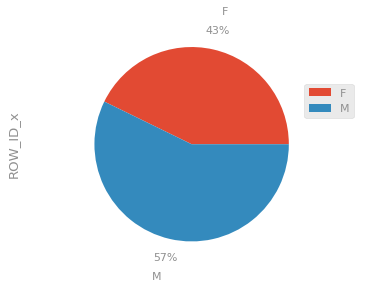

In [0]:
adult_patients_by_gender = ages_df.groupby('GENDER').count()['ROW_ID_x'].plot(kind='pie', autopct='%1.0f%%', 
                                                                              shadow=False, startangle=0, pctdistance=1.2, 
                                                                              labeldistance=1.4)
adult_patients_by_gender.axis('equal')
adult_patients_by_gender.legend(bbox_to_anchor=(1.0, 0.8))

In [0]:
# Median age: total patients (non-unique)
ages_df['AGES'].mean()

62.46057714796208

In [0]:
# Standard deviation
ages_df['AGES'].std()

16.58856729669096

In [0]:
# Median age: by gender
median_age = ages_df.groupby('GENDER')['AGES'].mean()
median_age

GENDER
F    63.517513
M    61.670698
Name: AGES, dtype: float64

In [0]:
# Standard deviation
ages_df.groupby('GENDER')['AGES'].std()

GENDER
F    16.984218
M    16.242075
Name: AGES, dtype: float64

Text(0, 0.5, '# Patients')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


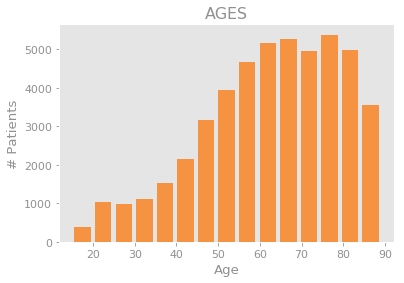

In [0]:
# Plot - total
ages_df.hist(column='AGES', bins=15, color='#f59342', grid=False, zorder=2, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('# Patients')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6e0ce7978>,
      dtype=object)

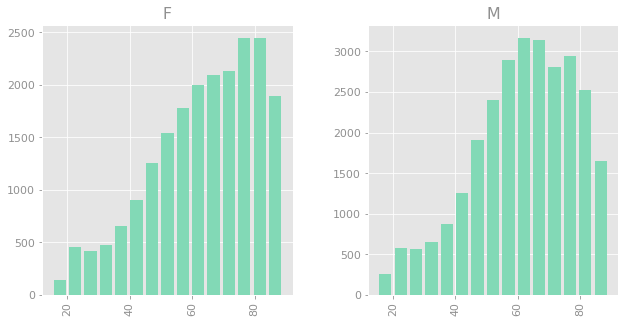

In [0]:
# Plots - by gender
ages_df.hist(column='AGES', by='GENDER', bins=15, color='#82d9b6', grid=False, zorder=2, rwidth=0.8, figsize=(10, 5))

### INSURANCE

In [0]:
# Count unique non-NA observations
# insurance = mimic_admission_df.groupby('INSURANCE')['SUBJECT_ID'].nunique()

# Count non-NA observations
insurance = mimic_admission_df.groupby('INSURANCE')['SUBJECT_ID'].count()
insurance.sort_values(ascending=False)

INSURANCE
Medicare      28215
Private       22582
Medicaid       5785
Government     1783
Self Pay        611
Name: SUBJECT_ID, dtype: int64

(-1.1180563215722998,
 1.1008598249032864,
 -1.1160806333608178,
 1.104134384643298)

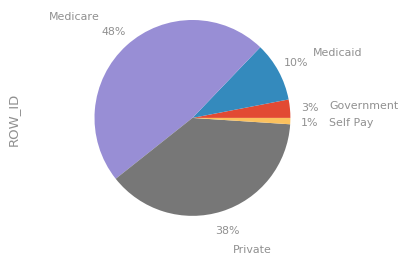

In [0]:
ins = mimic_admission_df.groupby(['INSURANCE']).count()['ROW_ID'].plot(kind='pie', autopct='%1.0f%%', 
                                                                       shadow=False, startangle=0, pctdistance=1.2, 
                                                                       labeldistance=1.4)
ins.axis('equal')
# ins.legend(frameon=False, bbox_to_anchor=(1.5, 0.8))

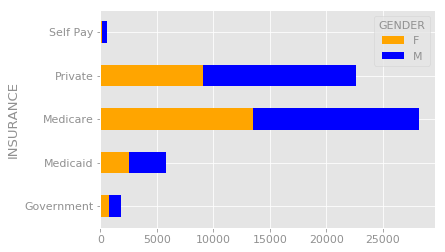

In [0]:
ap.groupby(['INSURANCE','GENDER']).size().unstack().plot(kind="barh", stacked=True, color=['orange', 'blue'])

In [0]:
# Stacked bar plot with two-level groupby, percentages normalized to 100%

# ap.groupby(['INSURANCE','GENDER']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()
#                                                                 ).unstack().plot(kind='bar', stacked=True, 
#                                                                                  color=['orange', 'blue'])
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.show()

Text(0, 0.5, 'Density')

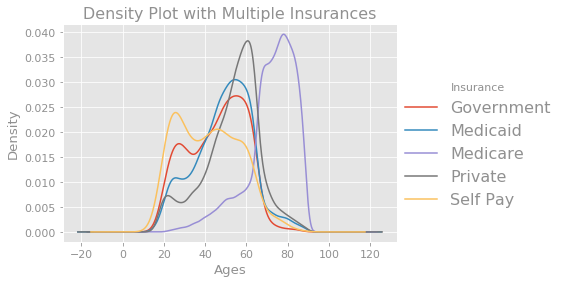

In [0]:
# Insurance by age
ages_df.groupby('INSURANCE')['AGES'].plot(kind='density')

# Plot formatting
plt.legend(prop={'size': 16}, title = 'Insurance', frameon=False, bbox_to_anchor=(1.5, 0.8))
plt.title('Density Plot with Multiple Insurances')
plt.xlabel('Ages')
plt.ylabel('Density')

#### Medicare:

"*Medicare is a national health insurance program in the United States, begun in 1966 under the 
Social Security Administration (SSA) and now administered by the Centers for Medicare and Medicaid Services (CMS). 
It provides health insurance for Americans aged 65 and older, younger people with some disability status as 
determined by the Social Security Administration, as well as people with end stage renal disease and amyotrophic 
lateral sclerosis (ALS or Lou Gehrig's disease).*"

Source: https://en.wikipedia.org/wiki/Medicare_(United_States)

#### Medicaid:

"*Medicaid in the United States is a federal and state program that helps with medical costs for some people with 
limited income and resources. Medicaid also offers benefits not normally covered by Medicare, including nursing 
home care and personal care services. The Health Insurance Association of America describes Medicaid as 
"a government insurance program for persons of all ages whose income and resources are insufficient to pay for 
health care."*"

Source: https://en.wikipedia.org/wiki/Medicaid

### LANGUAGE

In [0]:
# Count unique non-NA observations
# language = mimic_admission_df.groupby(mimic_admission_df.LANGUAGE.str.strip("*"))['SUBJECT_ID'].nunique()

# Count non-NA observations
language = mimic_admission_df.groupby(mimic_admission_df.LANGUAGE.str.strip("*"))['SUBJECT_ID'].count()
language.sort_values(ascending=False)

LANGUAGE
ENGL    29086
SPAN     1083
RUSS      790
PTUN      628
CANT      413
PORT      342
CAPE      256
MAND      156
HAIT      150
ITAL      124
VIET       94
GREE       75
ARAB       47
PERS       44
CAMB       37
POLI       34
AMER       31
HIND       24
KORE       23
ALBA       17
FREN       16
SOMA       13
THAI       12
ETHI       11
ARM         9
BEN         7
GUJ         7
CHI         7
LAOT        7
HUN         7
        ...  
BENG        2
 BE         2
FUL         2
KHM         2
LEB         2
TURK        2
TOY         2
TOI         2
MOR         2
SH          2
BOS         1
 FU         1
 T          1
ARA         1
TAM         1
SPA         1
SERB        1
ROM         1
RUS         1
FIL         1
PUN         1
PHI         1
PER         1
NEP         1
LIT         1
CRE         1
DEA         1
GERM        1
FAR         1
YOR         1
Name: SUBJECT_ID, Length: 75, dtype: int64

There are 33644 admissions with language information (57% from total). English represents 65% of them.
Obs.: It's necessary to merge some of them due to the lack of pattern when answering this field.

In [0]:
# Amount of registered languages without merge
language.count()

75

### RELIGION


In [0]:
# Count unique non-NA observations
# religion = mimic_admission_df.groupby('RELIGION')['SUBJECT_ID'].nunique()

# Count non-NA observations
religion = mimic_admission_df.groupby('RELIGION')['SUBJECT_ID'].count()
religion.sort_values(ascending=False)

RELIGION
CATHOLIC                  20606
NOT SPECIFIED             11753
UNOBTAINABLE               8269
PROTESTANT QUAKER          7134
JEWISH                     5314
OTHER                      2696
EPISCOPALIAN                774
GREEK ORTHODOX              459
CHRISTIAN SCIENTIST         429
BUDDHIST                    267
MUSLIM                      225
JEHOVAH'S WITNESS           139
UNITARIAN-UNIVERSALIST      124
HINDU                       113
ROMANIAN EAST. ORTH          83
7TH DAY ADVENTIST            81
BAPTIST                      28
HEBREW                       16
METHODIST                     7
LUTHERAN                      1
Name: SUBJECT_ID, dtype: int64

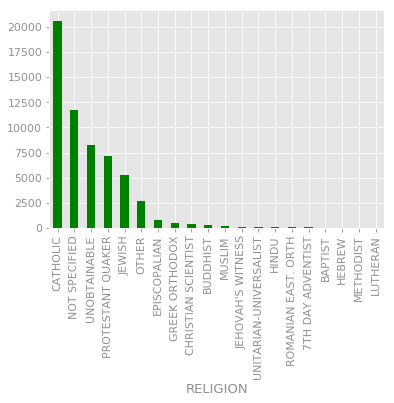

In [0]:
rel = mimic_admission_df.groupby(['RELIGION']).count()['ROW_ID']
rel.sort_values(ascending=False).plot(kind = 'bar', color='green')

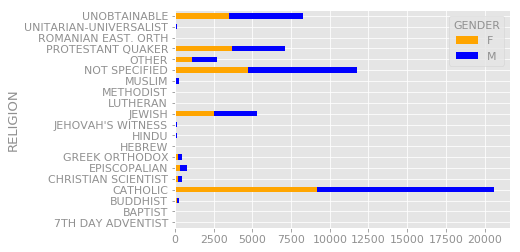

In [0]:
ap.groupby(['RELIGION','GENDER']).size().unstack().plot(kind="barh", stacked=True, color=['orange', 'blue'])

### MARITAL STATUS

In [0]:
# Count unique non-NA observations
# marital_st = mimic_admission_df.groupby('MARITAL_STATUS')['SUBJECT_ID'].nunique()

# Count non-NA observations
marital_st = mimic_admission_df.groupby('MARITAL_STATUS')['SUBJECT_ID'].count()
marital_st.sort_values(ascending=False)

MARITAL_STATUS
MARRIED              24239
SINGLE               13254
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
UNKNOWN (DEFAULT)      345
LIFE PARTNER            15
Name: SUBJECT_ID, dtype: int64

(-1.1264467775433058,
 1.1012594015637784,
 -1.1114479600723297,
 1.1285369970250627)

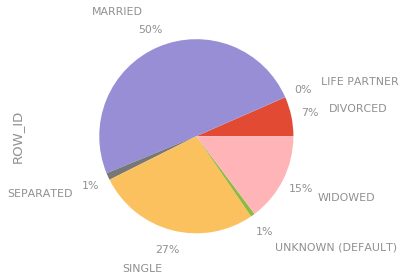

In [0]:
mar = mimic_admission_df.groupby(['MARITAL_STATUS']).count()['ROW_ID'].plot(kind='pie', autopct='%1.0f%%', 
                                                                      shadow=False, startangle=0, pctdistance=1.2, 
                                                                      labeldistance=1.4)
mar.axis('equal')
# mar.legend(frameon=False, bbox_to_anchor=(1.8, 0.8))

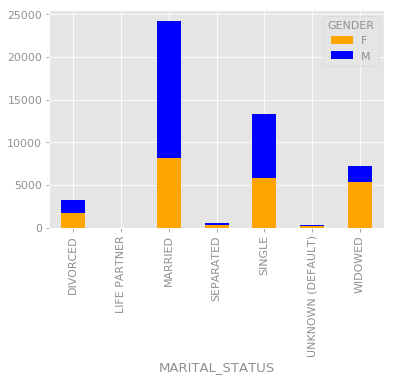

In [0]:
ap.groupby(['MARITAL_STATUS','GENDER']).size().unstack().plot(kind="bar", stacked=True, color=['orange', 'blue'])

### ETHNICITY

In [0]:
# Count unique non-NA observations
# ethnicity = mimic_admission_df.groupby('ETHNICITY')['SUBJECT_ID'].nunique()

# Count unique non-NA observations
ethnicity = mimic_admission_df.groupby('ETHNICITY')['SUBJECT_ID'].count()
ethnicity

ETHNICITY
AMERICAN INDIAN/ALASKA NATIVE                                  51
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE        3
ASIAN                                                        1509
ASIAN - ASIAN INDIAN                                           85
ASIAN - CAMBODIAN                                              17
ASIAN - CHINESE                                               277
ASIAN - FILIPINO                                               25
ASIAN - JAPANESE                                                7
ASIAN - KOREAN                                                 13
ASIAN - OTHER                                                  17
ASIAN - THAI                                                    4
ASIAN - VIETNAMESE                                             53
BLACK/AFRICAN                                                  44
BLACK/AFRICAN AMERICAN                                       5440
BLACK/CAPE VERDEAN                                            200


In [0]:
ethinicity_dict = ethnicity.to_dict()

sum_white = sum([value for key, value in ethinicity_dict.items() if 'WHITE' in key])
print("WHITE: " + str(sum_white))
sum_black = sum([value for key, value in ethinicity_dict.items() if 'BLACK' in key])
print("BLACK: " + str(sum_black))
sum_asian = sum([value for key, value in ethinicity_dict.items() if 'ASIAN' in key])
print("ASIAN: " + str(sum_asian))
sum_latino = sum([value for key, value in ethinicity_dict.items() if 'LATINO' in key])
print("LATINO: " + str(sum_latino))
print("OTHER: 1512\nUNKNOWN/NOT SPECIFIED: 4523")

WHITE: 41325
BLACK: 5785
ASIAN: 2007
LATINO: 2128
OTHER: 1512
UNKNOWN/NOT SPECIFIED: 4523


There were 41325 admissions from white people. This represents 70% from total. Blacks represent only 9,8%, followed by unknown (7,7%), asians and latinos (~3,5%).

#### Example 

In [0]:
# Select
mimic_admission_df.loc[(mimic_admission_df['SUBJECT_ID'] == 109) & (mimic_admission_df['HADM_ID'] == 172335)]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
172,128,109,172335,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,0,1


### 3. DIAGNOSES AND ICD9 CODES TABLES

International Classification of Diseases (ICD). 
ICD-9 codes corresponding to the diagnosis assigned to the patient for the given row.

In [7]:
mimic_diagnoses_df = pd.read_csv(io.BytesIO(uploaded['DIAGNOSES_ICD.csv']))
mimic_diagnoses_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [8]:
mimic_diagnoses_descriptions_df = pd.read_csv(io.BytesIO(uploaded['D_ICD_DIAGNOSES.csv']))
mimic_diagnoses_descriptions_df.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [0]:
diagnoses_icd9_count_dict = mimic_diagnoses_df['ICD9_CODE'].value_counts().to_dict()

diagnoses_icd9_count_dict2 = {}
for k, v in diagnoses_icd9_count_dict.items():
    row = mimic_diagnoses_descriptions_df.loc[(mimic_diagnoses_descriptions_df['ICD9_CODE'] == k)]
    diagnosis_description = row.get('LONG_TITLE').to_list()
    if diagnosis_description:
        diagnoses_icd9_count_dict2[diagnosis_description[0]] = v
    else: 
        diagnoses_icd9_count_dict2[k] = v

In [0]:
diagnoses_icd9_df = pd.DataFrame(list(diagnoses_icd9_count_dict2.items()), columns=['DIAGNOSIS', 'PATIENTS'])
diagnoses_icd9_df.head()

,DIAGNOSES,PATIENTS
0,Unspecified essential hypertension,20703
1,"Congestive heart failure, unspecified",13111
2,Atrial fibrillation,12891
3,Coronary atherosclerosis of native coronary ar...,12429
4,"Acute kidney failure, unspecified",9119


#### Demographics and Diagnoses

In [12]:
mimic_patients_diagnoses_df = pd.merge(ages_df, mimic_diagnoses_df, on = 'SUBJECT_ID' , how = 'inner')
mimic_patients_diagnoses_df.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID_x,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGES,ROW_ID,HADM_ID_y,SEQ_NUM,ICD9_CODE
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,19,F,2131-05-07,NaN,NaN,NaN,0,64.926816,151,165315,1.0,9678
1,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,19,F,2131-05-07,NaN,NaN,NaN,0,64.926816,152,165315,2.0,9693
2,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,19,F,2131-05-07,NaN,NaN,NaN,0,64.926816,153,165315,3.0,E9502
3,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,19,F,2131-05-07,NaN,NaN,NaN,0,64.926816,154,165315,4.0,E9503
4,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,19,F,2131-05-07,NaN,NaN,NaN,0,64.926816,155,165315,5.0,3488


#### Diagnoses by Gender

In [0]:
gender_diagnoses = mimic_patients_diagnoses_df.groupby(['ICD9_CODE','GENDER']).size().unstack()
gender_diagnoses = gender_diagnoses.reset_index()
gender_diagnoses = gender_diagnoses.sort_values(by=['F', 'M'], ascending=False)

In [0]:
gender_diagnoses.insert(1, 'DIAGNOSIS', 'NULL')

In [0]:
# iterate over the dataframe row by row
for index_label, row_series in gender_diagnoses.iterrows():
   # For each row update 'Diagnosis' field
   row = mimic_diagnoses_descriptions_df.loc[(mimic_diagnoses_descriptions_df['ICD9_CODE'] == row_series.ICD9_CODE)]
   diagnosis_description = row.get('LONG_TITLE').to_list()
   if diagnose_description:
    gender_diagnoses.at[index_label, 'DIAGNOSIS'] = diagnosis_description[0]

In [138]:
gender_diagnoses

GENDER,ICD9_CODE,DIAGNOSIS,F,M
1928,4019,Unspecified essential hypertension,16011.0,18793.0
2074,4280,"Congestive heart failure, unspecified",13358.0,16011.0
2063,42731,Atrial fibrillation,9414.0,13552.0
2914,5849,"Acute kidney failure, unspecified",9027.0,10859.0
2984,5990,"Urinary tract infection, site not specified",8233.0,5256.0
810,25000,Diabetes mellitus without mention of complicat...,7521.0,9373.0
1984,41401,Coronary atherosclerosis of native coronary ar...,7369.0,14783.0
931,2724,Other and unspecified hyperlipidemia,7197.0,8954.0
2499,51881,Acute respiratory failure,7010.0,8075.0
2593,53081,Esophageal reflux,6585.0,6511.0


####Diagnoses by Ethnicity

In [0]:
# iterate over the dataframe row by row
for index_label, row_series in mimic_patients_diagnoses_df.iterrows():
  if 'WHITE' in row_series.ETHNICITY:
    mimic_patients_diagnoses_df.at[index_label, 'ETHNICITY'] = 'WHITE'
  elif 'BLACK' in row_series.ETHNICITY:
    mimic_patients_diagnoses_df.at[index_label, 'ETHNICITY'] = 'BLACK'
  elif 'HISPANIC/LATINO' in row_series.ETHNICITY:
    mimic_patients_diagnoses_df.at[index_label, 'ETHNICITY'] = 'HISPANIC/LATINO'
  elif 'ASIAN' in row_series.ETHNICITY:
    mimic_patients_diagnoses_df.at[index_label, 'ETHNICITY'] = 'ASIAN'
  elif 'AMERICAN' in row_series.ETHNICITY:
    mimic_patients_diagnoses_df.at[index_label, 'ETHNICITY'] = 'AMERICAN'

In [0]:
# by Ethnicity
eth_diagnoses = mimic_patients_diagnoses_df.groupby(['ICD9_CODE','ETHNICITY']).size().unstack(level=1)
eth_diagnoses = eth_diagnoses.reset_index()
eth_diagnoses = eth_diagnoses.sort_values(by='WHITE', ascending=False)

####Diagnoses by Religion

In [0]:
# blah

####Diagnoses by Marital Status

####Diagnoses by Age

### 4. ICUSTAYS TABLE


In [0]:
mimic_icustays_df = pd.read_csv(io.BytesIO(uploaded['ICUSTAYS.csv']))
mimic_icustays_df.head()

In [0]:
mimic_icustays_df.groupby('FIRST_CAREUNIT')['SUBJECT_ID'].nunique()